In [34]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import time

In [2]:
# 设置显示所有的列
pd.options.display.max_columns = None

In [3]:
pwd

'D:\\Documents\\MyProjects\\DataAnalysis\\Kaggle\\House-price-regression-#1'

不知道为什么，cd命令的cell里不能有注释

mac路径

In [5]:
cd Kaggle/House-price-regression-#1/data

/Users/danielzhang/Documents/Python-Projects/DataAnalysis/Kaggle/House-price-regression-#1/data


windows路径

In [4]:
cd D:\\Documents\\MyProjects\\DataAnalysis\\Kaggle\\House-price-regression-#1\\data

D:\Documents\MyProjects\DataAnalysis\Kaggle\House-price-regression-#1\data


# EDA

In [5]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [6]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [21]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

+ 查看一下目标变量Sales的分布  
由下面可以看出，Sales是明显的偏态分布，这意味着有可能需要对它做**Box-Cox**变换

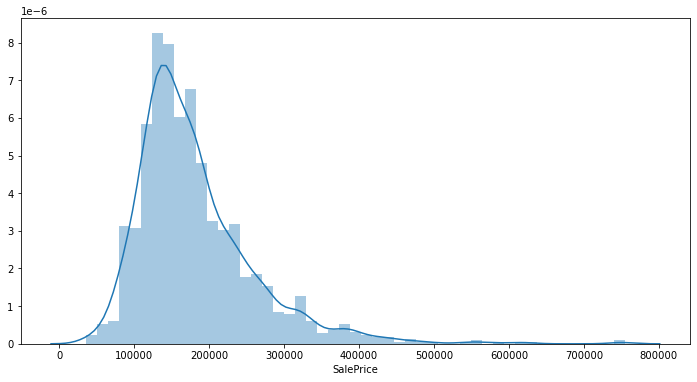

In [7]:
fig, ax = plt.subplots(figsize=(12,6))
sns.distplot(train['SalePrice'], ax=ax)

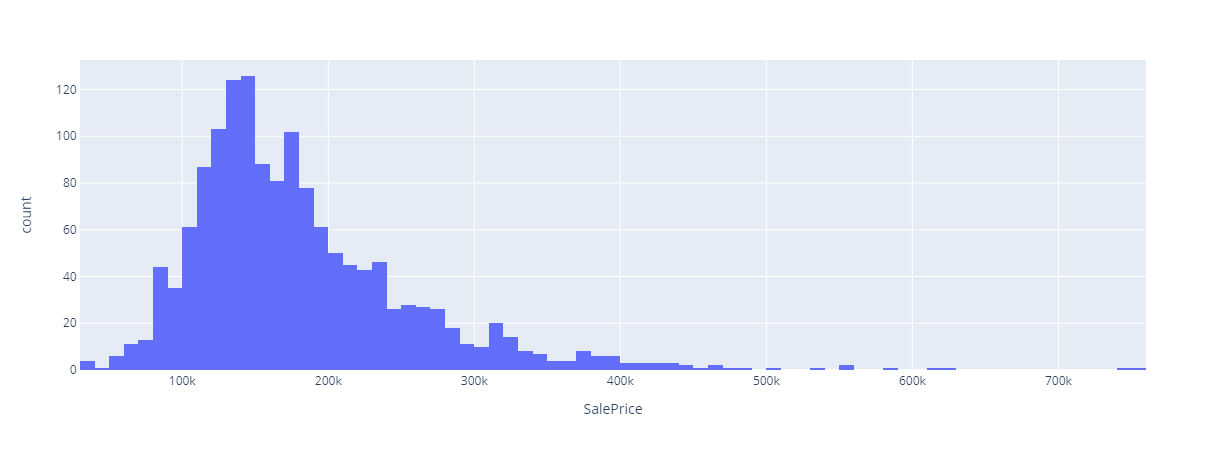

In [8]:
px.histogram(data_frame=train, x='SalePrice')

In [9]:
train.shape

(1460, 81)

+ 初步探索各个变量和 SalesPrice 的相关性——相关性矩阵   

In [10]:
# 首先查看各个变量之间的相关系数，这里的相关系数只对数值特征进行计算
correlation_matrix = train.corr()

In [11]:
correlation_matrix.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

使用热力图来查看相关系数的情况

In [12]:
# 使用seaborn绘制
# fig, ax = plt.subplots(figsize=(12,12))
# sns.heatmap(correlation_matrix, ax=ax)

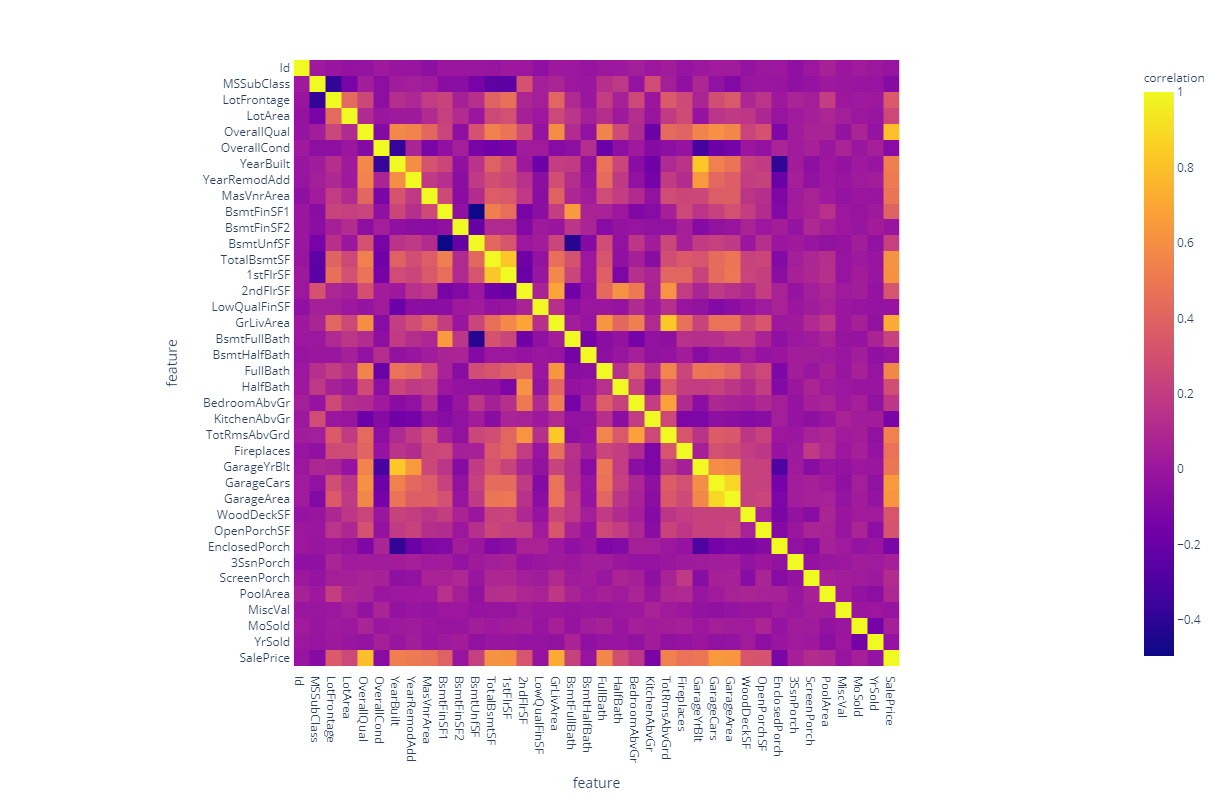

In [13]:
cols = correlation_matrix.columns
px.imshow(img=correlation_matrix, width=1000, height=800, x=cols, y=cols, labels={'x':'feature','y':'feature','color':'correlation'})
# trace = go.Heatmap()
# fig = go.Figure()

选择和SalePrice相关系数最高的前15个变量查看一下热力图

In [14]:
# 注意，这类是选择根据 SalePrice 降序的 top 10记录里，SalePrice 列的index，
# 不能直接选择DF，否则会出现 shape 的行数和列数不匹配的情况
correlation_top_index = correlation_matrix.nlargest(n=15, columns='SalePrice')['SalePrice'].index
correlation_top = train[correlation_top_index].corr()

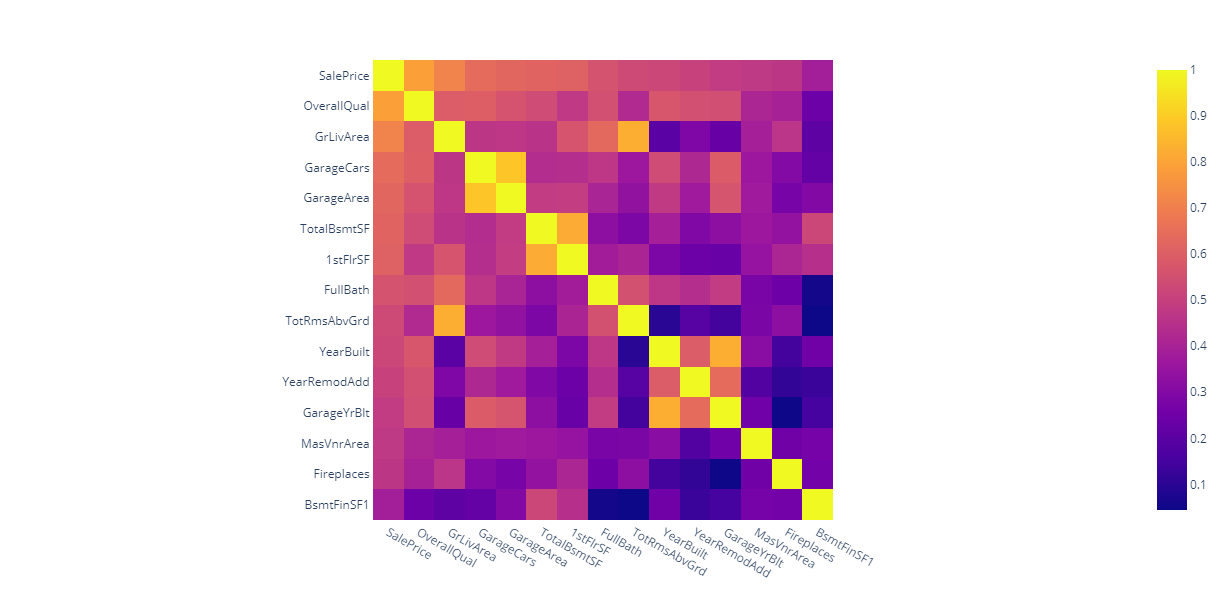

In [15]:
px.imshow(correlation_top, x=correlation_top_index, y=correlation_top_index, width=800, height=600)

In [16]:
correlation_top

SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  \
SalePrice      1.000000     0.790982   0.708624    0.640409    0.623431   
OverallQual    0.790982     1.000000   0.593007    0.600671    0.562022   
GrLivArea      0.708624     0.593007   1.000000    0.467247    0.468997   
GarageCars     0.640409     0.600671   0.467247    1.000000    0.882475   
GarageArea     0.623431     0.562022   0.468997    0.882475    1.000000   
TotalBsmtSF    0.613581     0.537808   0.454868    0.434585    0.486665   
1stFlrSF       0.605852     0.476224   0.566024    0.439317    0.489782   
FullBath       0.560664     0.550600   0.630012    0.469672    0.405656   
TotRmsAbvGrd   0.533723     0.427452   0.825489    0.362289    0.337822   
YearBuilt      0.522897     0.572323   0.199010    0.537850    0.478954   
YearRemodAdd   0.507101     0.550684   0.287389    0.420622    0.371600   
GarageYrBlt    0.486362     0.547766   0.231197    0.588920    0.564567   
MasVnrArea     0.477493     0.411876   0.390857    0.364204    0.373066   
Fireplaces     0.466929     0.396765   0.461679    0.300789    0.269141   
BsmtFinSF1     0.386420     0.239666   0.208171    0.224054    0.296970   

              TotalBsmtSF  1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  \
SalePrice        0.613581  0.605852  0.560664      0.533723   0.522897   
OverallQual      0.537808  0.476224  0.550600      0.427452   0.572323   
GrLivArea        0.454868  0.566024  0.630012      0.825489   0.199010   
GarageCars       0.434585  0.439317  0.469672      0.362289   0.537850   
GarageArea       0.486665  0.489782  0.405656      0.337822   0.478954   
TotalBsmtSF      1.000000  0.819530  0.323722      0.285573   0.391452   
1stFlrSF         0.819530  1.000000  0.380637      0.409516   0.281986   
FullBath         0.323722  0.380637  1.000000      0.554784   0.468271   
TotRmsAbvGrd     0.285573  0.409516  0.554784      1.000000   0.095589   
YearBuilt        0.391452  0.281986  0.468271      0.095589   1.000000   
YearRemodAdd     0.291066  0.240379  0.439046      0.191740   0.592855   
GarageYrBlt      0.322445  0.233449  0.484557      0.148112   0.825667   
MasVnrArea       0.363936  0.344501  0.276833      0.280682   0.315707   
Fireplaces       0.339519  0.410531  0.243671      0.326114   0.147716   
BsmtFinSF1       0.522396  0.445863  0.058543      0.044316   0.249503   

              YearRemodAdd  GarageYrBlt  MasVnrArea  Fireplaces  BsmtFinSF1  
SalePrice         0.507101     0.486362    0.477493    0.466929    0.386420  
OverallQual       0.550684     0.547766    0.411876    0.396765    0.239666  
GrLivArea         0.287389     0.231197    0.390857    0.461679    0.208171  
GarageCars        0.420622     0.588920    0.364204    0.300789    0.224054  
GarageArea        0.371600     0.564567    0.373066    0.269141    0.296970  
TotalBsmtSF       0.291066     0.322445    0.363936    0.339519    0.522396  
1stFlrSF          0.240379     0.233449    0.344501    0.410531    0.445863  
FullBath          0.439046     0.484557    0.276833    0.243671    0.058543  
TotRmsAbvGrd      0.191740     0.148112    0.280682    0.326114    0.044316  
YearBuilt         0.592855     0.825667    0.315707    0.147716    0.249503  
YearRemodAdd      1.000000     0.642277    0.179618    0.112581    0.128451  
GarageYrBlt       0.642277     1.000000    0.252691    0.046822    0.153484  
MasVnrArea        0.179618     0.252691    1.000000    0.249070    0.264736  
Fireplaces        0.112581     0.046822    0.249070    1.000000    0.260011  
BsmtFinSF1        0.128451     0.153484    0.264736    0.260011    1.000000

从上面的相关系数热力图可以找到如下几个信息：  
1. 和SalePrice有较强的线性关系的变量有：  
OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd 这10个，它们的相关系数都在 0.5 以上；
2. 可能存在共线性关系的变量：  
GarageCars 和 GarageArea，  TotalBsmtSF 和 1stFlrSF， GrLivArea 和 TotRmsAbvGrd， YearBuilt 和 GarageYrBlt，这4对变量选择其中一个即可

这样，**前10个相关系数最高的特征里，选择的是 OverallQual, GrLivArea, GarageCars, ~GarageArea~, TotalBsmtSF, ~1stFlrSF~, FullBath, ~TotRmsAbvGrd~, YearBuilt, YearRemodAdd**.  
还有一个 GarageYrBlt 需要去除。

+ 选择最为相关的10个变量看一下 矩阵图  
Seaborn的pairplot绘图很慢，所以不能一次性查看太多变量的两两绘图  
这里也可以看出哪些变量可能有异常值

In [17]:
# cols = ['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']
cols = ['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']

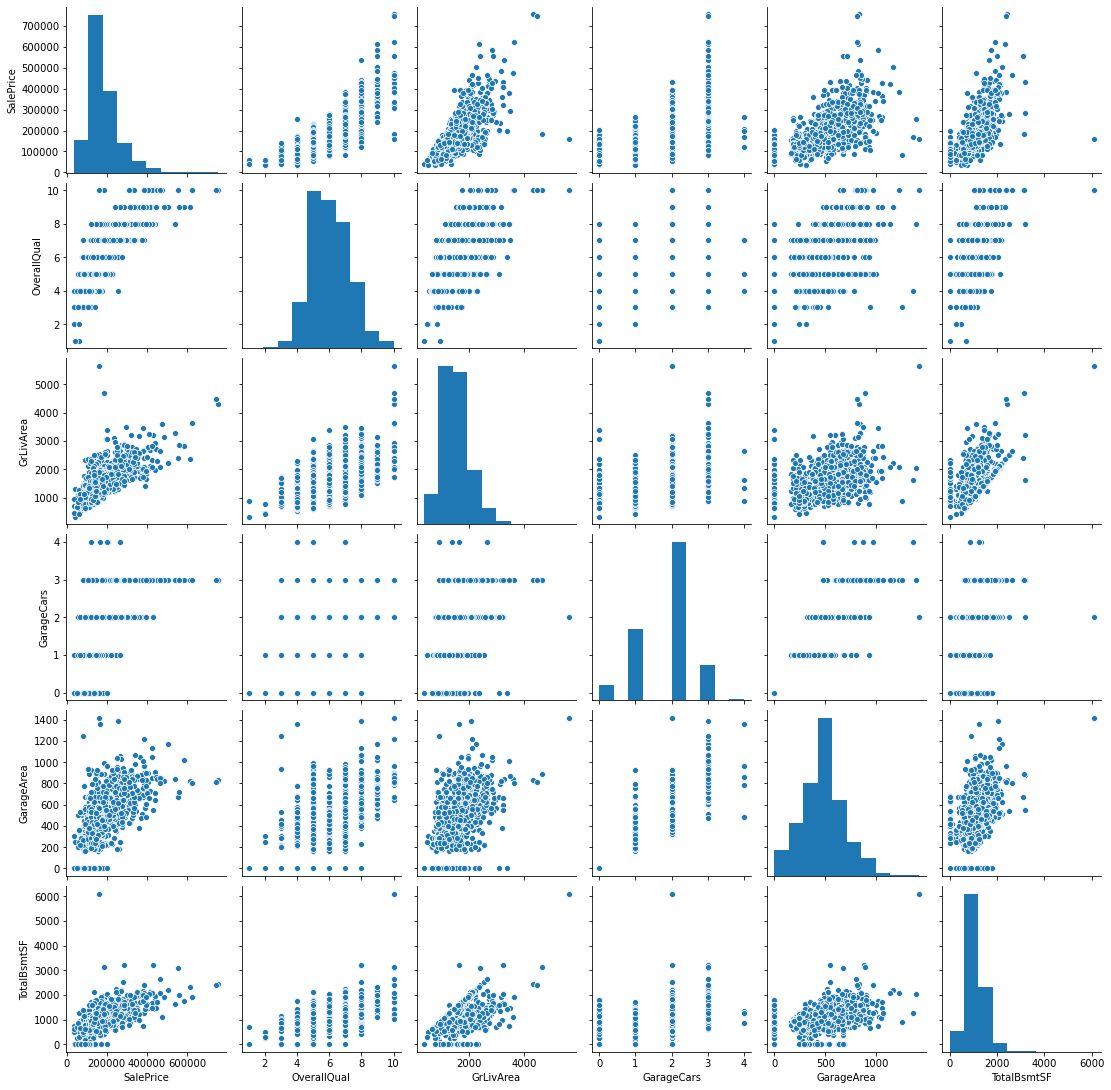

In [18]:
# fig, ax = plt.subplots(figsize=(12,6))
# sns.pairplot(train[correlation_top_index])
sns.pairplot(train[cols])

# 数据预处理

## 异常值

这里只对和Sales相关程度最高的5个变量进行异常值检测

+ Sales和OverallQual，这是个有序离散特征  

不过不对这个特征下做任何处理

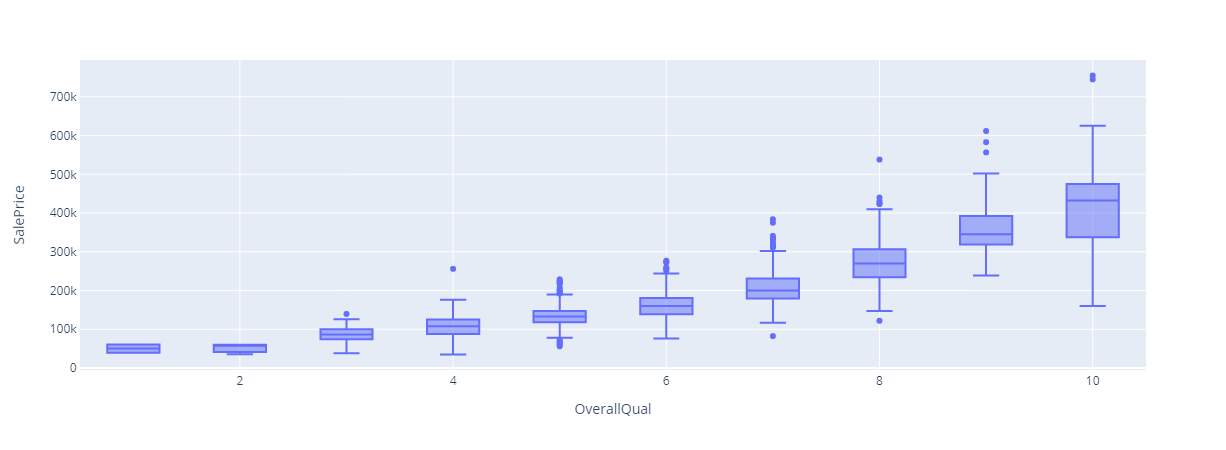

In [25]:
px.box(data_frame=train, x='OverallQual', y='SalePrice')

+ Sales和GrLivArea 

这里可以看出有两个异常值，GrLivArea = 4676 和 5642，需要删除

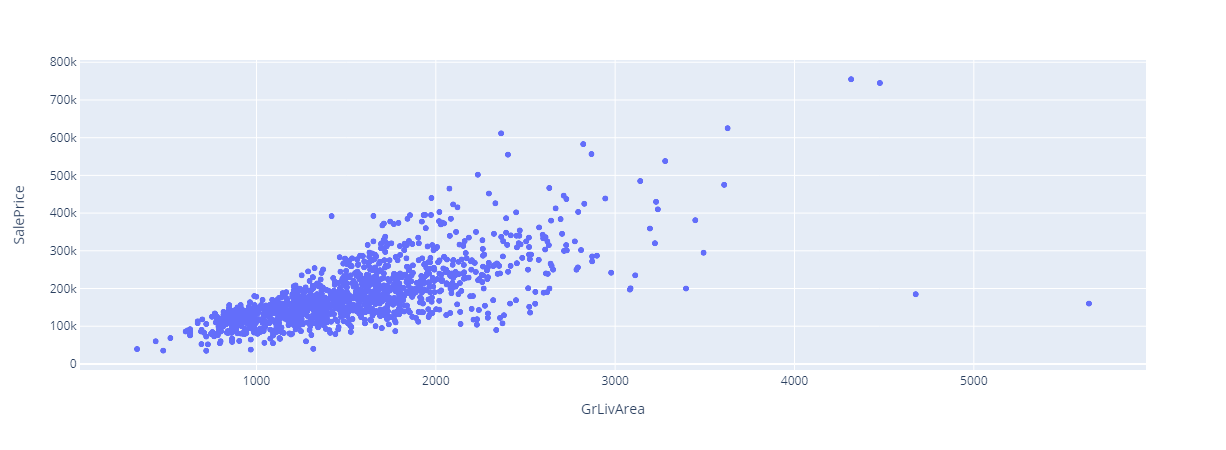

In [24]:
px.scatter(data_frame=train, x = 'GrLivArea', y = 'SalePrice')

+ GarageCars 和 GarageArea

这个没有

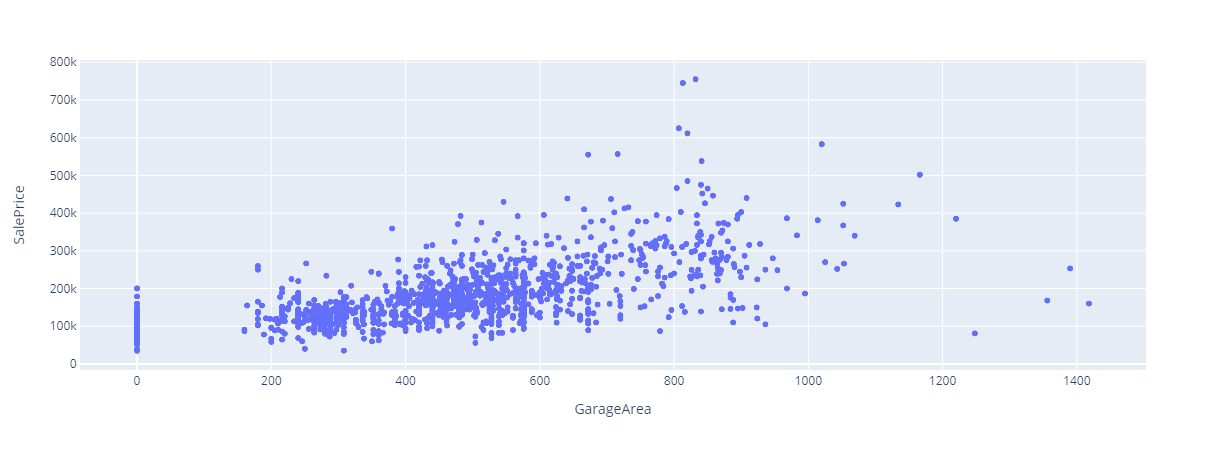

In [29]:
# px.scatter(data_frame=train, x = 'GarageCars', y = 'SalePrice')
px.scatter(data_frame=train, x = 'GarageArea', y = 'SalePrice')

+ Sales和TotalBsmtSF  

有一个异常值，TotalBsmtSF = 6110

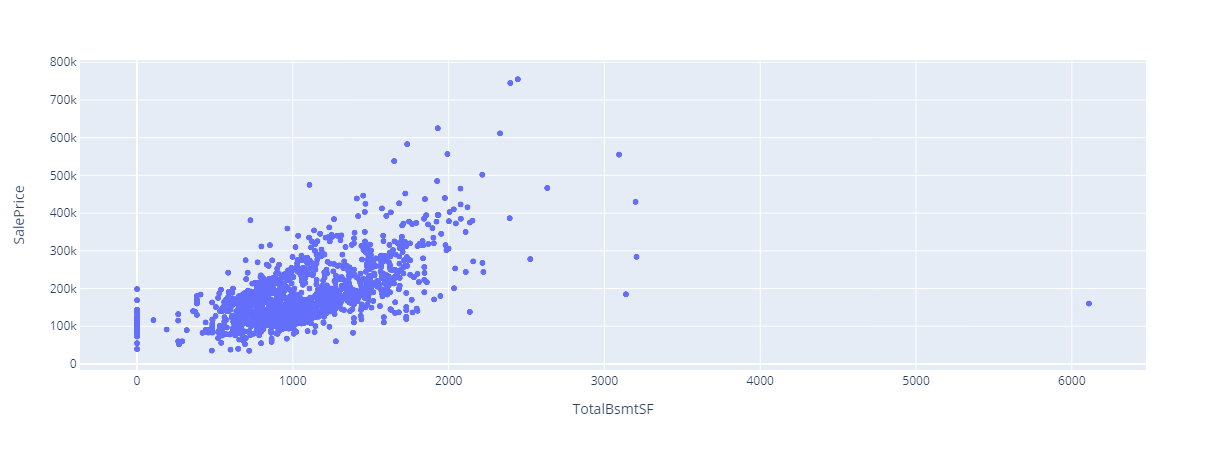

In [26]:
px.scatter(data_frame=train, x='TotalBsmtSF', y='SalePrice')

所以，最终要删除的异常值就三个：  
GrLivArea = 4676 和 5642， TotalBsmtSF = 6110

In [32]:
train = train[train['GrLivArea'] < 4600 ]
train = train[train['TotalBsmtSF'] < 6000]

检查一下结果

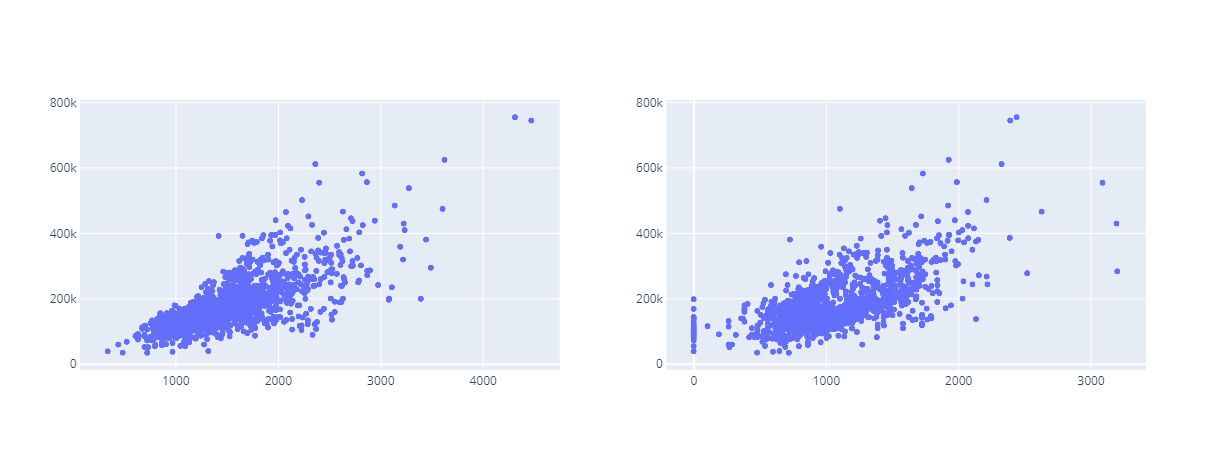

In [45]:
fig = make_subplots(1,2)
f1 = px.scatter(data_frame=train, x = 'GrLivArea', y = 'SalePrice')
f2 = px.scatter(data_frame=train, x='TotalBsmtSF', y='SalePrice')

fig.add_trace(f1.data[0], row=1, col=1)
fig.add_trace(f2.data[0], row=1, col=2)

fig.update_layout()
# fig.show()

## 缺失值

In [81]:
def miss_stat(df):
    """
    用于统计DF中各列的缺失值信息和占比
    """
    miss_num = df.isnull().sum()
    # miss_num[miss_num > 0].sort_values(ascending=False)
    total = df.shape[0]
    miss_persent = miss_num/total*100
    miss_info = pd.concat([miss_num, miss_persent, train.dtypes], axis = 1, keys=['miss_num', 'miss_percent','dtype'])
    miss_info['total'] = total
    miss_info = miss_info[['miss_num','total','miss_percent','dtype']]
#     降序排列，同时设置小数点的位数
    miss_info = miss_info.sort_values(by=['miss_num'],ascending=False).round(decimals=2)
#     打印
#     from IPython.display import display
#     display(miss_info[miss_info['miss_num'] > 0])  # 或者 print df.to_html()
#     print(miss_info[miss_info['miss_num'] > 0])
    return miss_info

def miss_stat_all(train, test):
    train_miss = miss_stat(train)
    test_miss = miss_stat(test)
    miss_info = train_miss.join(test_miss, lsuffix='_train', rsuffix='_test')
#     这里的逻辑与必须要使用pandas的 | ，而不是Python本身的or
    miss_info = miss_info.loc[ (miss_info['miss_num_train'] > 0) | (miss_info['miss_num_test'] > 0), :].sort_values(by=['miss_num_train'],ascending=False)
    return miss_info

In [82]:
# miss_info = miss_stat(train)
# miss_info[miss_info['miss_num'] > 0]
miss_info = miss_stat_all(train, test)
miss_info

miss_num_train  total_train  miss_percent_train dtype_train  \
PoolQC                  1452         1458               99.59      object   
MiscFeature             1404         1458               96.30      object   
Alley                   1367         1458               93.76      object   
Fence                   1177         1458               80.73      object   
FireplaceQu              690         1458               47.33      object   
LotFrontage              259         1458               17.76     float64   
GarageYrBlt               81         1458                5.56     float64   
GarageCond                81         1458                5.56      object   
GarageType                81         1458                5.56      object   
GarageFinish              81         1458                5.56      object   
GarageQual                81         1458                5.56      object   
BsmtFinType2              38         1458                2.61      object   
BsmtExposure              38         1458                2.61      object   
BsmtQual                  37         1458                2.54      object   
BsmtCond                  37         1458                2.54      object   
BsmtFinType1              37         1458                2.54      object   
MasVnrType                 8         1458                0.55      object   
MasVnrArea                 8         1458                0.55     float64   
Electrical                 1         1458                0.07      object   
Utilities                  0         1458                0.00      object   
Exterior2nd                0         1458                0.00      object   
BsmtFinSF1                 0         1458                0.00       int64   
BsmtUnfSF                  0         1458                0.00       int64   
TotalBsmtSF                0         1458                0.00       int64   
BsmtFinSF2                 0         1458                0.00       int64   
MSZoning                   0         1458                0.00      object   
BsmtFullBath               0         1458                0.00       int64   
SaleType                   0         1458                0.00      object   
GarageArea                 0         1458                0.00       int64   
GarageCars                 0         1458                0.00       int64   
BsmtHalfBath               0         1458                0.00       int64   
KitchenQual                0         1458                0.00      object   
Functional                 0         1458                0.00      object   
Exterior1st                0         1458                0.00      object   

              miss_num_test  total_test  miss_percent_test dtype_test  
PoolQC               1456.0        1459              99.79     object  
MiscFeature          1408.0        1459              96.50     object  
Alley                1352.0        1459              92.67     object  
Fence                1169.0        1459              80.12     object  
FireplaceQu           730.0        1459              50.03     object  
LotFrontage           227.0        1459              15.56    float64  
GarageYrBlt            78.0        1459               5.35    float64  
GarageCond             78.0        1459               5.35     object  
GarageType             76.0        1459               5.21     object  
GarageFinish           78.0        1459               5.35     object  
GarageQual             78.0        1459               5.35     object  
BsmtFinType2           42.0        1459               2.88     object  
BsmtExposure           44.0        1459               3.02     object  
BsmtQual               44.0        1459               3.02     object  
BsmtCond               45.0        1459               3.08     object  
BsmtFinType1           42.0        1459               2.88     object  
MasVnrType             16.0        1459               1.10     object  
MasVnrArea            

In [87]:
miss_info.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
       'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'MasVnrType', 'MasVnrArea', 'Electrical', 'Utilities', 'Exterior2nd',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFinSF2', 'MSZoning',
       'BsmtFullBath', 'SaleType', 'GarageArea', 'GarageCars', 'BsmtHalfBath',
       'KitchenQual', 'Functional', 'Exterior1st'],
      dtype='object')

In [114]:
# 下面这些列里的NA都表示None,
cols_none_object = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                    'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
                   'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
                   'MasVnrType']

# 下面这些列使用众数填充
cols_na_mode = ['Electrical','Exterior2nd', 'MSZoning', 'SaleType','KitchenQual','Functional', 'Exterior1st']

# 下面的列直接丢弃
cols_drop = ['Utilities']


# 下面这些列是数值列
cols_na_num = ['LotFrontage',   'MasVnrArea', 'GarageYrBlt', 'GarageArea', 'GarageCars',
               'BsmtFinSF1',  'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFinSF2',  'BsmtFullBath', 'BsmtHalfBath']

In [115]:
print( len(list(miss_info.index)) )
print( len(cols_none_object) + len(cols_na_num) +len(cols_na_mode) + len(cols_drop) )

34
34


+ 使用 None字符串 填充

In [111]:
for col in cols_none_object:
    train[col] = train[col].fillna('None')
    test[col] = test[col].fillna('None')

+ 使用 众数 填充

In [112]:
for col in cols_na_mode:
    train[col] = train[col].fillna(train[col].mode()[0])
    test[col] = test[col].fillna(test[col].mode()[0])

+ 直接丢弃的列

In [113]:
for col in cols_drop:
    train.drop(col, axis=1, inplace=True)
    test.drop(col, axis=1, inplace=True)

+ 数值列的填充

In [117]:
cols_num = ['MasVnrArea', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1',  'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFinSF2',  'BsmtFullBath', 'BsmtHalfBath']
for col in cols_num:
    train[col] = train[col].fillna(0)
    test[col] = test[col].fillna(0)
    
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].mean())

检查是否还有缺失值

In [120]:
miss_info_check = miss_stat_all(train, test)
miss_info_check.head()

Empty DataFrame
Columns: [miss_num_train, total_train, miss_percent_train, dtype_train, miss_num_test, total_test, miss_percent_test, dtype_test]
Index: []

## 特征工程

+ 检查目标变量 SalePrice 的正态性